Kelompok 7 :
- Anggit Daneswara Purbaningrum (M0118009)
- Ayya Agustina Riza            (M0118020)
- Yuriska Christina A. S        (M0118072)
- Bayu Purboutomo               (M0119016)
- Jasmine Laksmi Maharani       (M0119047)

# KNN (K-Kearest Neighbor)

KNN merupakan suatu metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya. Tujuan algoritma KNN adalah untuk mengklasifikasikan obyek baru berdasarkan atribut dan sample-sample dari training data. KNN memiliki beberapa
keunggulan dan kelemahan, keunggulannya yaitu :1) pelatihan sangat cepat; 2)
sederhana dan mudah dipelajari; 3) tahan terhadap data pelatihan yang memiliki
derau; dan 4) efektif jika data pelatihan besar. Sedangkan kekurangan dari KNN
adalah: 1) nilai k menjadi bias; 2) komputasi yang kompleks; 3) keterbatasan
memori; dan 4) mudah tertipu dengan atribut yang tidak relevan.

## Menampilkan dataset

In [78]:
# import library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
# import dataset breast cancer

data = pd.read_excel('breast cancer.xlsx')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [80]:
# cek tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [81]:
# cek statistik deskriptif

print(data.describe())

              Age         BMI  ...        MCP.1  Classification
count  116.000000  116.000000  ...   116.000000      116.000000
mean    57.301724   27.582111  ...   534.647000        1.551724
std     16.112766    5.020136  ...   345.912663        0.499475
min     24.000000   18.370000  ...    45.843000        1.000000
25%     45.000000   22.973205  ...   269.978250        1.000000
50%     56.000000   27.662416  ...   471.322500        2.000000
75%     71.000000   31.241442  ...   700.085000        2.000000
max     89.000000   38.578759  ...  1698.440000        2.000000

[8 rows x 10 columns]


## Skewness (kecondongan grafik suatu data)

- normal distribution (condong data simetris) dimana nilai mean dan modus adalah sama (mean = modus). MEAN = MEDIAN = MODUS
- left-skewed distribution (condong negatif) dimana nilai modus lebih dari nilai mean (modus > mean). MEAN<MEDIAN<MODUS
- right-skewed distribution (condong positif) dimana nilai mean lebih dari nilai modus (mean > modus). MEAN  >  MEDIAN  >  MODUS
    


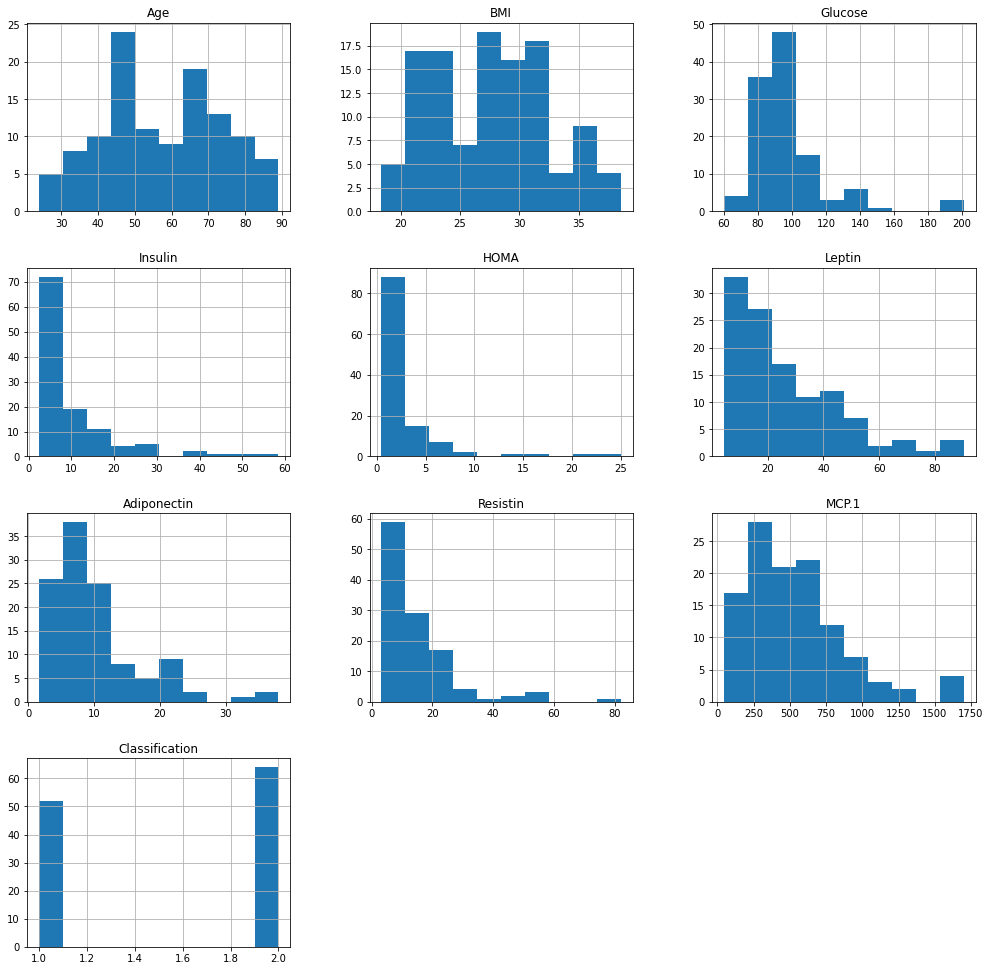

In [114]:
# plotting distribusi tiap variabel 

p = data.hist(figsize=(17,17))

2    64
1    52
Name: Classification, dtype: int64


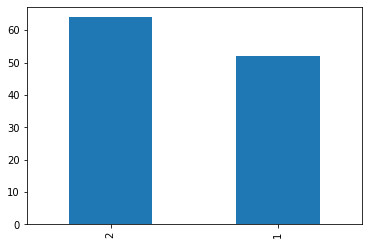

In [83]:
# cek data penderita positif breast cancer dan bukan penderita breast cancer
# 1 : bukan penderita breast cancer
# 2 : penderita breast cancer

color_wheel = {1: "#0392cf", 
               2: "#7bc043"}

colors = data["Classification"].map(lambda x: color_wheel.get(x + 1))
print(data.Classification.value_counts())
p=data.Classification.value_counts().plot(kind="bar")

## Scatter plot

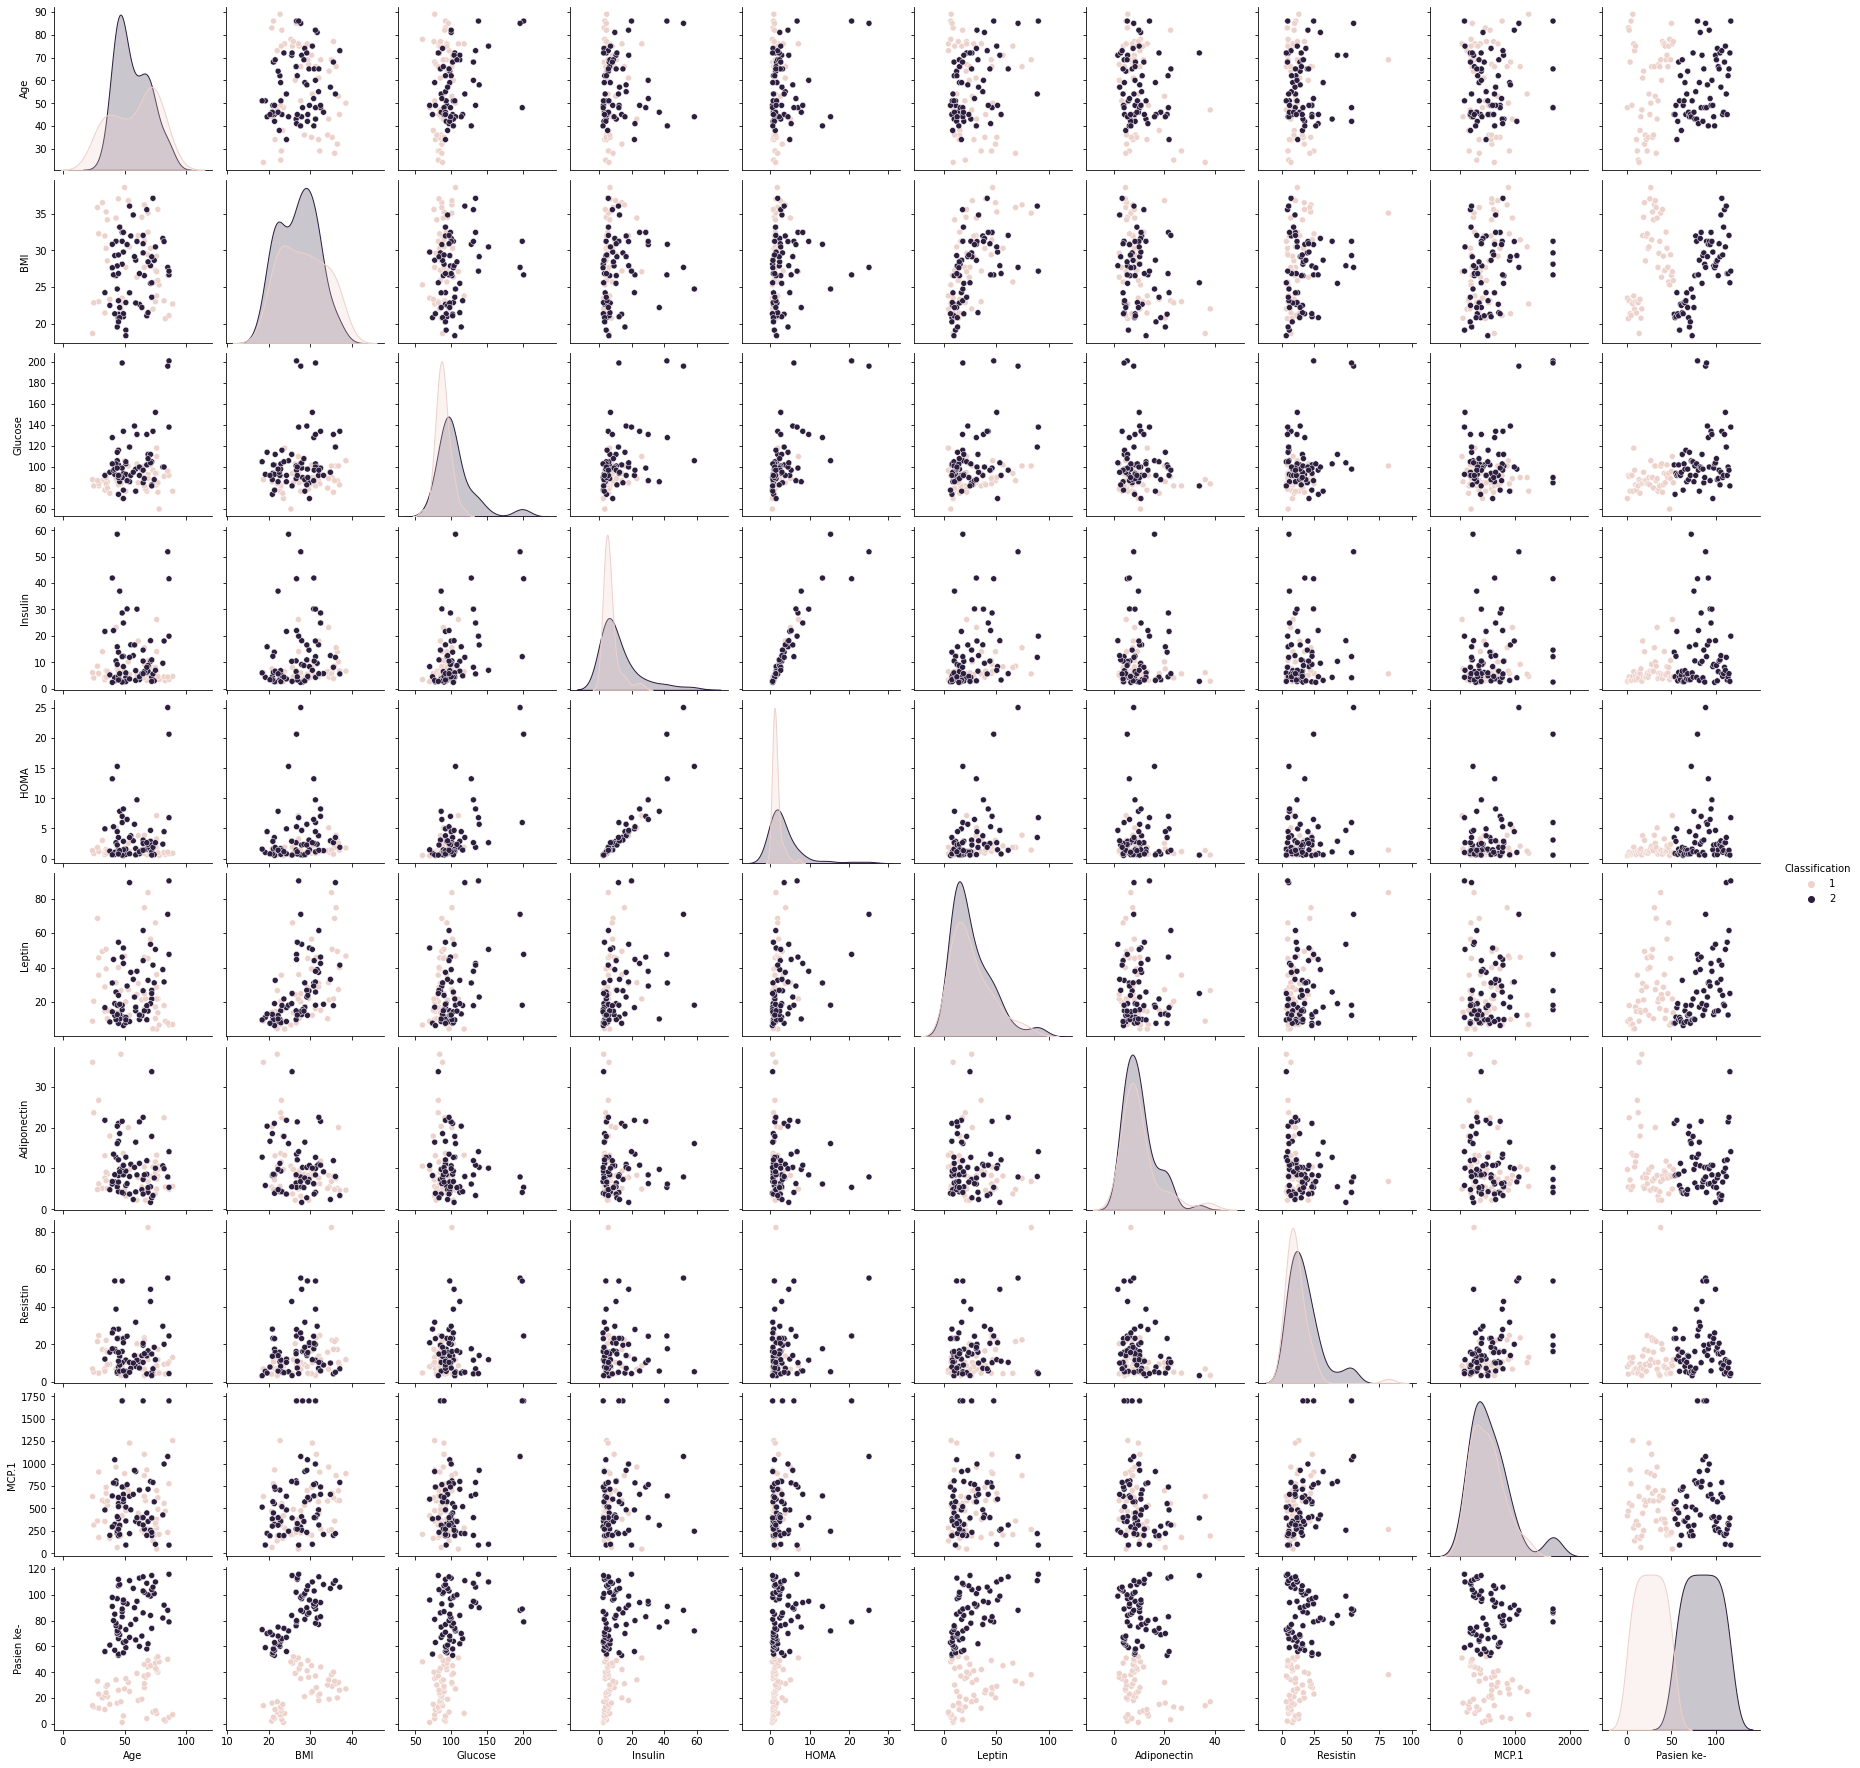

In [84]:
# grafik scatter plot untuk melihat hubungan antar 2 variabel
# dan garik yang diagonal untuk melihat distribusi pada single variable

p=sns.pairplot(data_final, hue = 'Classification')

## Koefisien Korelasi

koefisien korelasi membantu mengetahui hubungan antar variabel

In [85]:
korelasi = data_final.corr()
korelasi

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Pasien ke-
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555,0.115645
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586,0.192389
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315,0.406137
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804,0.275767
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012,0.283705
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078,0.241154
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490,-0.083246
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310,0.203764
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381,0.022575
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000,0.861411


## Memberi label pada tiap data/object

In [86]:
# memberi label pasien
# pertama kita buat iterasinya
index = []
i=0

while i<116: #jumlah pasien dalam dataset sebanyak 116 pasien
    i+=1
    index.append(i)
    
# variabel index sekarang sudah mengandung 116 label pasien
# dengan tipe data 'list', bisa kita cek dengan 'type(index)'
# agar bisa di gabung dengan dataframe diabetes
# tipe datanya perlu kita ubah menjadi array
# sintaknya sebagai berikut

index_array = np.asarray(index)
index_array

# untuk memastikan tipe data sudah berubah kita bisa mengecek
# dengan 'typeof(index_array)'

# lalu kita gabung ke dataset utama kita
data_final['Pasien ke-']=index_array

data_final

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Pasien ke-
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,2
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,4
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,5
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1,6
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1,7
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1,8
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1,9
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1,10


In [87]:
# menentukan variable independen yang digunakan, 
# yakni seluruh kolom kecuali kolom hasil atau kolom "Classification"
# sehingga kolom "Classification" dihapus
X = data_final.drop(columns=["Classification"])
# X = data_diabetes_final

# sedangkan variabel dependen yang digunakan adalah hasil atau "Classification"
# sehingaa kita hanya menggunaka kolom "Classification"
y = data["Classification"]


In [88]:
# cek variabel X, apakah kolom Classification sudah hilang

X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,2
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,4
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,5
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,6
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,7
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,8
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,9
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,10


## Membagi data training dan data testing

data training akan dipakai untuk menentukan modelnya dan data testing akan dipakai untuk mengecek apakah model yang telah dibuat memiliki tingkat keakuratan yang bagus. Disini akan dibagi porsi data training dengan data testing sebesar 90 : 10

In [90]:
# Import module untuk membagi data yang ada menjadi data training dan testing
from sklearn.model_selection import train_test_split

# membagi data training and data test, 90:10
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.1, random_state=123)

In [91]:
# tabel data training

X_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,6
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
13,24,18.670000,88,6.107,1.330000,8.8800,36.060000,6.85000,632.220,14
44,71,30.300000,102,8.340,2.098344,56.5020,8.130000,4.29890,200.976,45
82,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034,83
101,66,26.562500,89,6.524,1.432235,14.9084,8.429960,14.91922,269.487,102
70,45,20.260000,92,3.440,0.780651,7.6500,16.670000,7.84000,193.870,71
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,61
62,49,21.367521,78,2.640,0.507936,6.3339,3.886145,22.94254,737.672,63
42,75,27.300000,85,5.197,1.089638,10.3900,9.000805,7.57670,335.393,43


In [92]:
# mengurutkan data

data_training_sortBy_ascending = X_train.sort_values(by='Pasien ke-', ascending=True)
data_training_sortBy_ascending

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,2
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,4
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,6
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,7
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,8
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,10
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600,11
11,29,23.010000,82,5.663,1.145436,35.5900,26.720000,4.58000,174.800,12


In [93]:
# data_training_sortBy_ascending_ = data_training_sortBy_ascending['Glucose']
# a= pd.DataFrame(data_training_sortBy_ascending_)
# pd.set_option('max_row', None)
# round(a,0)
# a.to_numeric()

terdapat 104 data pasien yang akan kita pakai sebagai data training

In [95]:
# tabel data test
X_test

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,5
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886,90
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,54
100,74,28.650138,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401,101
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928,29
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,106
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,60
65,45,23.140496,116,4.902,1.402626,17.9973,4.294705,5.26330,518.586,66
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,91
33,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246,34


In [96]:
# mengurutkan data

# X_test.sort_values['Glucose']
data_testing_sortBy_ascending = X_test.sort_values(by='Pasien ke-', ascending=True)
data_testing_sortBy_ascending

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,5
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,9
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928,29
33,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246,34
50,76,27.100000,110,26.211,7.111918,21.7780,4.935635,8.49395,45.843,51
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,54
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,60
65,45,23.140496,116,4.902,1.402626,17.9973,4.294705,5.26330,518.586,66
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886,90
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,91


In [97]:
pd.set_option("min_row", 40)
data_testing_sortBy_ascending

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,5
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,9
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928,29
33,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246,34
50,76,27.100000,110,26.211,7.111918,21.7780,4.935635,8.49395,45.843,51
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,54
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,60
65,45,23.140496,116,4.902,1.402626,17.9973,4.294705,5.26330,518.586,66
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886,90
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,91


terdapat 12 data pasien yang akan kita pakai sebagai data testing

In [100]:
# sebelum mencari hasil prediksinya, hapus kolom 'pasien ke-' agar tidak mempengaruhi hasil test

X_train_ = X_train.drop(columns=["Pasien ke-"])
y_train_ = y_train.drop(columns=["Pasien ke-"])
X_test_ = X_test.drop(columns=["Pasien ke-"])
y_test_ = y_test.drop(columns=["Pasien ke-"])


## Mencari nilai K dan membuat model

In [101]:
from sklearn.neighbors import KNeighborsClassifier

train_score=[]
test_score =[]

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_,y_train_)
    
    train_score.append(knn.score(X_train_, y_train_))
    test_score.append(knn.score(X_test_, y_test))


In [102]:
# score dari data train

max_train_score = max (train_score)
train_scores_ind = [i for i, v in enumerate(train_score) 
                   if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [103]:
# score dari data test

max_test_score = max (test_score)
test_scores_ind = [i for i, v in enumerate(test_score) 
                   if v == max_test_score]

print('Max train score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max train score 58.333333333333336 % and k = [1, 2]


## Visualisasi data train score dan test score

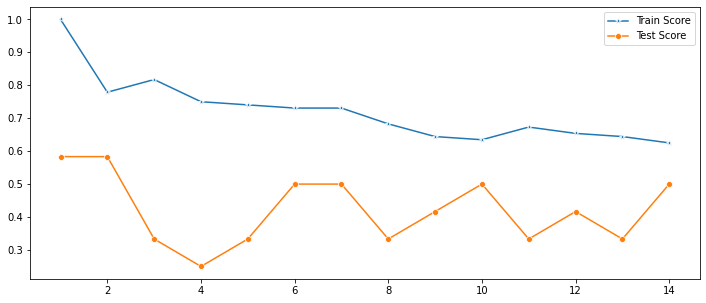

In [104]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_score, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_score, marker='o', label='Test Score')

In [106]:
# dari gambar diperoleh k terbaiknya yakni pada k=2, yang akan digunakan pada final model berikut

knn = KNeighborsClassifier(2)

knn.fit(X_train_, y_train_)


knn.score(X_test_,y_test_)

0.5833333333333334

## Menampilkan hasil data test

In [107]:
#  menampilkan hasil prediksi dari X_test

y_predict= knn.predict(X_test_)
y_predict

array([2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1])

In [108]:
# menampilkan tabel prediksi dari data test

test_result = pd.DataFrame(y_predict)
test_result

,0
0,2
1,1
2,2
3,1
4,1
5,2
6,1
7,1
8,2
9,1


## Menggabungkan data test dan data prediksi

untuk melihat hasil prediksi dari data test kita perlu membuat kolom baru yang akan digunakan sebagai 'primary key' untuk menggabungkan tabel prediksi dengan tabel data test kita. disini kita akan membuat kolom bernama 'index' yang akan digunakan sebagai 'primary key'

In [109]:
# membuat kolom index pada tabel prediksi

index = []
i=0

while i<12:
    i+=1
    index.append(i)
    
# type(index)
index_array = np.asarray(index)
index_array

test_result['index']=index_array
test_result

,0,index
0,2,1
1,1,2
2,2,3
3,1,4
4,1,5
5,2,6
6,1,7
7,1,8
8,2,9
9,1,10


In [110]:
# membuat kolom index pada tabel data test

index = []
i=0

while i<12:
    i+=1
    index.append(i)
    
# type(index)
index_array = np.asarray(index)
index_array

X_test['index']=index_array
# # data_test=X_test.drop(columns=["e","Cluster","Predict"])
# # X_test.drop(columns=["Cluster"])
# # X_test.drop(columns=["Predict"])
data_test = X_test
data_test

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Pasien ke-,index
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,5,1
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886,90,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,54,3
100,74,28.650138,88,3.012,0.653805,31.1233,7.652220,18.35574,572.401,101,4
28,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928,29,5
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,106,6
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,60,7
65,45,23.140496,116,4.902,1.402626,17.9973,4.294705,5.26330,518.586,66,8
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,91,9
33,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246,34,10


## Mengecek Ke-akuratan hasil prediksi

In [111]:
# keakuratan prediksi data

from sklearn.metrics import classification_report, confusion_matrix

print (confusion_matrix(y_test, y_predict))

[[4 1]
 [4 3]]


Text(0.5, 15.0, 'Predicted label')

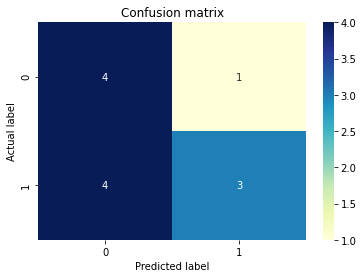

In [112]:
# membuat plot nya

y_pred = knn.predict(X_test_)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

berdasarkan output diatas diketahui bahwa  
- ada 3 pasien yang positif breast cancer dan diprediksi dengan benar
- ada 4 pasien yang negatif breast cancer dan diprediksi dengan benar
- ada 4 pasien yang diprediksi negatif breast cancer namun pada dataset awal(data real) dia positif breast cancer
- ada 1 pasien yang diprediksi positif breast cancer namun pada dataset awal(data real) dia negatif breast cancer


In [113]:
#  melihat ketepatan prediksi

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.50      0.80      0.62         5
           2       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



berdasarkan report ketepatan prediksi diatas, diketahui bahwa keakuratan model prediksi kita yakni sebesar 0.65 atau 65% yang merupakan nilai yang cukup baik untuk sebuah model prediksi